In [15]:
from matplotlib import pyplot as plt
import numpy as np
import tifffile as tiff

from osgeo import gdal
from osgeo import ogr

In [26]:
gdal.UseExceptions()

srtm_path = 'srtm_63_06.tif'
img_path = '/Volumes/JROD2/SAR_test/UNWRAP_subset_0_of_S1A_IW_SLC__1SSV_20160408T091355_20160408T091430_010728_01001F_83EB_Orb_Stack_ifg_deb_ML_flt_dem_TC.tif'

In [13]:
ds = gdal.Open(img_path)
band = ds.GetRasterBand(1)
arr = band.ReadAsArray()

In [16]:
dst_layername = "Shape"
drv = ogr.GetDriverByName("ESRI Shapefile")
dst_ds = drv.CreateDataSource( "poly_out.shp" )
dst_layer = dst_ds.CreateLayer(dst_layername, srs = None )
# raster_field = ogr.FieldDefn('elevation', type_mapping[srcband.DataType])
# dst_layer.CreateField(raster_field)
gdal.Polygonize(band, None, dst_layer, 0, [], callback=None)

0

In [32]:

# or as an alternative if the input is already a gdal raster object you can use that gdal object
input_raster=gdal.Open(srtm_path)
# input_shape = "path/to/yourShapefile.shp" # or any other format
# output_raster="path/to/outputDEM.tif" #your output raster file

ds = gdal.Warp("test.tif",
              "srtm_63_06.tif",
              format = 'GTiff',
              cutlineDSName = "poly_out.shp",
#               cropToCutline=True,# or any other file format
#               cutlineWhere="FIELD = 'whatever'" # optionally you can filter your cutline (shapefile) based on attribute values
              dstNodata = -9999) # select the no data value you like
ds=None #do other stuff with ds object, it is your cropped dataset. in this c

RuntimeError: Did not get any cutline features.

In [2]:
srtm = tiff.imread('srtm_63_06.tif')

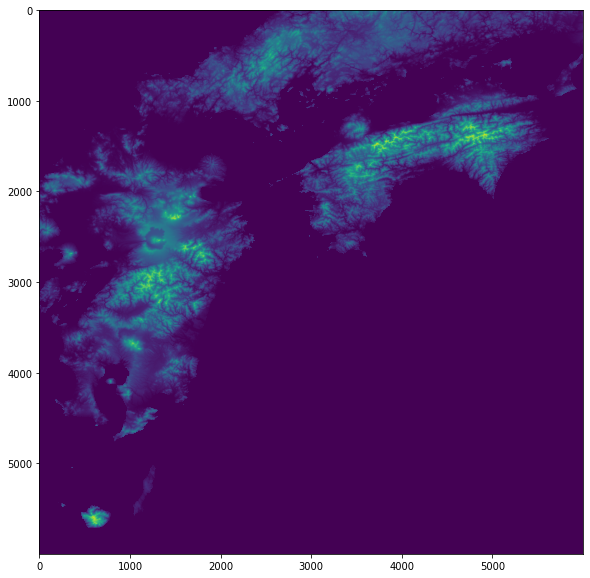

In [8]:
plt.figure(figsize=(12,10))
plt.imshow(arr, vmin=0)

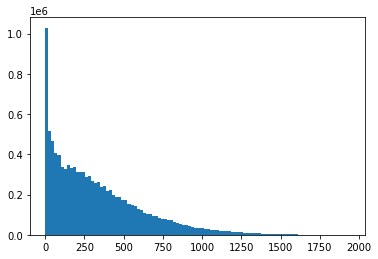

In [24]:
plt.hist(srtm.flatten(), bins=100, range=(0,1941))
plt.show()

In [23]:
srtm.max()

1941